In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

869


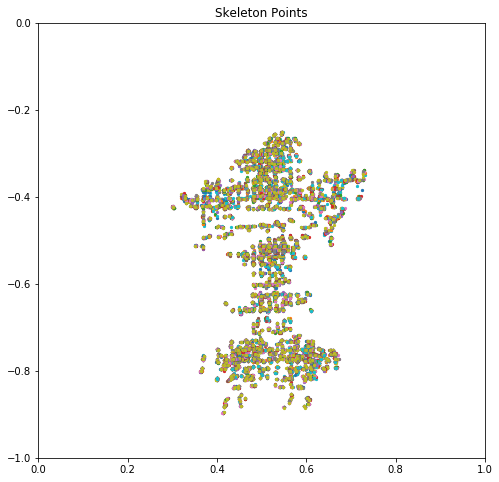

In [2]:
BASE_DIR = "D:\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer\Second-Position"

#run through each dancer folder and plot the coordinates
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                #print(file_path)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                sc = ax.scatter(x,y, s=5)
                count+=1
plotCoordinates()
print(count)

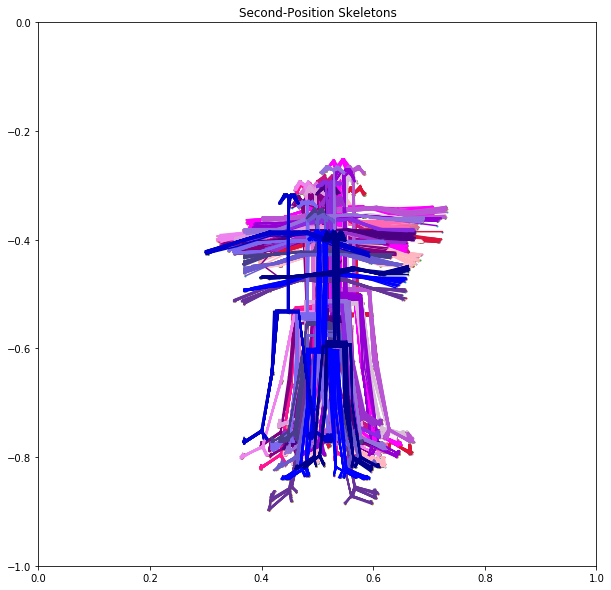

In [3]:

bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
allXList =[]
allYList = []
dancerNum = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title('Second-Position Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                allXList.append(x)
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                allYList.append(y)
                sc = ax.scatter(x,y, s=1)
                for bone in bones:
                    #Remove the 0,0 xy coordinates plotting
                    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                        #print("zero values for joint: ",x.index(x[bone[0]]))
                        #print("zero values for joint: ",x.index(x[bone[1]]))
                        continue
                    #ax.plot([x_values],[y_values])
                    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        dancerNum+=1
plotSkeletons()

In [4]:
np.save('allSecondPositionXList.npy', allXList)
np.save('allSecondPositionYList.npy', allYList)

In [5]:
xloaded = np.load('allSecondPositionXList.npy')
print(xloaded)
print(len(xloaded))
yloaded = np.load('allSecondPositionYList.npy')
print(yloaded)
print(len(yloaded))

[[0.542086 0.542063 0.503275 ... 0.464475 0.466467 0.501213]
 [0.544052 0.542055 0.503265 ... 0.464491 0.466467 0.50121 ]
 [0.544073 0.544043 0.503272 ... 0.464428 0.466417 0.501196]
 ...
 [0.531793 0.533861 0.503223 ... 0.474645 0.478686 0.511359]
 [0.53181  0.533874 0.503234 ... 0.474657 0.478668 0.511371]
 [0.531818 0.533874 0.503231 ... 0.474639 0.476715 0.511352]]
869
[[-0.333361 -0.401672 -0.401658 ... -0.815737 -0.807623 -0.810318]
 [-0.333363 -0.401652 -0.401621 ... -0.815697 -0.807536 -0.81029 ]
 [-0.330769 -0.40161  -0.40159  ... -0.815732 -0.807597 -0.810268]
 ...
 [-0.39887  -0.458765 -0.461523 ... -0.818501 -0.815669 -0.813052]
 [-0.398808 -0.456134 -0.4615   ... -0.818553 -0.815697 -0.815627]
 [-0.398897 -0.458781 -0.461519 ... -0.818576 -0.815727 -0.813083]]
869


In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
print(sumXList)
print(sumYList)

#Get the average: sum/count
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
print(avgXList)
print(avgYList)

[448.5057440000002, 449.1016549999998, 419.3544440000001, 369.97989899999976, 324.14974, 479.58449, 529.5267129999997, 574.9745170000002, 449.8444489999999, 431.1031980000003, 425.5760619999998, 410.4783690000003, 469.9552609999997, 477.5876960000002, 495.7075350000004, 442.25720100000046, 455.03714400000035, 433.6301679999994, 463.6632250000006, 526.0700450000007, 525.1479339999999, 490.2981149999998, 380.84316099999984, 382.4127079999994, 415.14886499999983]
[-280.87716399999977, -340.0651910000002, -340.24160100000006, -354.11911700000013, -361.84679200000033, -338.71804200000014, -349.53768900000006, -352.751781, -468.0062560000003, -468.3419220000004, -571.2785019999998, -665.9024359999993, -468.166326, -570.0402200000001, -666.2950009999993, -273.1431010000002, -272.84989199999995, -285.17715199999986, -284.98693600000036, -682.1440459999992, -675.6589360000005, -677.9663619999989, -683.6569610000012, -676.8879539999992, -677.0475780000004]
[0.5161170817031073, 0.5168028250863059

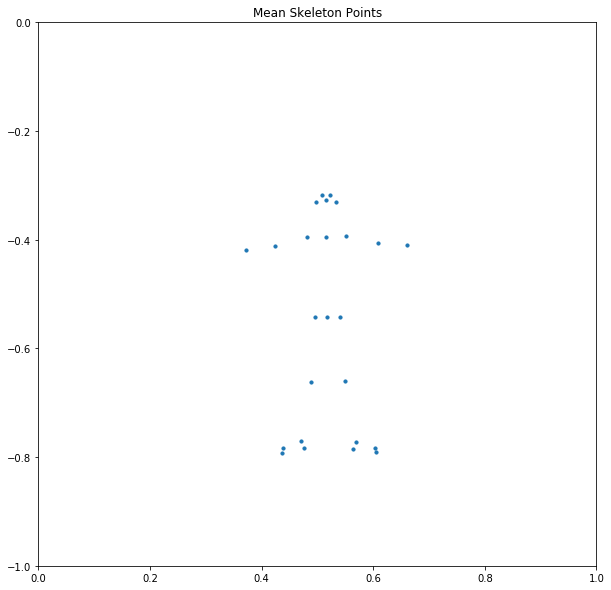

In [13]:
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
            
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [7]:
#calculation of standard deviation values:
import statistics

In [8]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY) 

Standard Deviations of X values: [0.02659668748901784, 0.02667323999785543, 0.026589051807692828, 0.027987199458788786, 0.02864592673891702, 0.028037843699624334, 0.029002739114956513, 0.03215805880419711, 0.027046178342768786, 0.0268460015901137, 0.02710041733058507, 0.028669438876308538, 0.028279304769315852, 0.02851418549348011, 0.02985645290942641, 0.027193949094536134, 0.02790477516743273, 0.0265119877595489, 0.0267970226504645, 0.032235223411166226, 0.031845214581257025, 0.03027554663932776, 0.02861892121174417, 0.028797183714282297, 0.028854335129631706]
Standard Deviations of Y values: [0.03760667668907913, 0.033722661293459466, 0.033703957457336606, 0.03278683450716423, 0.03434353234988568, 0.03348499311520994, 0.03419056243927468, 0.03653147720702288, 0.03144856648641447, 0.031142029884071817, 0.028671051130049554, 0.0286553319879932, 0.031860248349166134, 0.02917709264746425, 0.02855594735725881, 0.03662706495489046, 0.03674423557487203, 0.03662184330889218, 0.03705961943474

In [9]:
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [10]:
np.save('SecondPositionStdDevX.npy', standardDeviationX)
np.save('SecondPositionStdDevY.npy', standardDeviationY)
np.save('SecondPositionMeanX.npy', avgXList)
np.save('SecondPositionMeanY.npy', avgYList)